# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2023.09.13.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [1]:
MY_UNIQNAME = 'mattcalc'  # replace this with your uniqname

* Copilot was used to help solve this problem set

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Read in the data

raw_invoices = pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
items = pd.read_json('https://github.com/umsi-data-science/data/raw/main/items.json')
products = pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')

In [4]:
invoices = raw_invoices[raw_invoices['InvoiceNo'].str.startswith('C') != True]

print(invoices['InvoiceNo'].drop_duplicates().count())
invoices.head()

22064


,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [5]:
# Adding SC to the StockCode column in items to align with StockCodeSC in invoices
items['StockCodeSC'] = 'SC' + items['StockCode']
items.drop('StockCode', axis=1, inplace=True)
print(items.shape[0])
items.head()

4070


,Description,UnitPrice,StockCodeSC
0,WHITE HANGING HEART T-LIGHT HOLDER,2.55,SC85123A
1,WHITE METAL LANTERN,3.39,SC71053
2,CREAM CUPID HEARTS COAT HANGER,2.75,SC84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,SC84029G
4,RED WOOLLY HOTTIE WHITE HEART.,3.39,SC84029E


In [6]:
print(products.shape[0])
products.head()

541909


,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


In [7]:
# Merge the three datasets together
products_items = products.merge(items, left_on='StockCodeSC', right_on='StockCodeSC')
df = invoices.merge(products_items, left_on='InvoiceNo', right_on='InvoiceNo')
print(df.shape[0])
df.head()


535965


,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,Description,UnitPrice
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6,WHITE METAL LANTERN,3.39
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8,CREAM CUPID HEARTS COAT HANGER,2.75
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [8]:
df.InvoiceNo.value_counts()
df.CustomerID.value_counts()
df.StockCodeSC.value_counts()
mask = df.isnull().any(axis=1)
null_values = df[mask]
null_values.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,Description,UnitPrice
613,536414,12/1/10 11:52,NaN,United Kingdom,SC22139,56,RETROSPOT TEA SET CERAMIC 11 PC,4.25
1431,536544,12/1/10 14:32,NaN,United Kingdom,SC85123A,4,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1432,536544,12/1/10 14:32,NaN,United Kingdom,SC71053,1,WHITE METAL LANTERN,3.39
1433,536544,12/1/10 14:32,NaN,United Kingdom,SC84029G,1,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
1434,536544,12/1/10 14:32,NaN,United Kingdom,SC84029E,1,RED WOOLLY HOTTIE WHITE HEART.,3.39


*Github Copilot was used to help with this assignment*

After loading the dataset invoices which were cancelled (indicated with a c in the InvoiceNo were removed from the dataset) and duplicates were removed

---
1. Data set is loaded
1. 22064 different invoice numbers after removing canceled invoices and duplicants
2. 4340 different customer IDs after removing duplicates
3. 4070 different stock codes
4. 1 column `CustomerID` column has nulls, no other column shows nulls
1. The dataset have already been merge into dataframe `df`. The process started by making a new column in the items dataframe called `StockCodeSC` which added 'SC' to the `StockCode` column. This was done to allign the formatting with the `StockCodeSC` column in products. The original `StockCode` column was then dropped from the dataframe. Products and items were then merged on `StockCodeSC` and the resulting dataframe was merged with invoices on `InvoiceNo`. The resulting dataframe was saved to `df` and used for the rest of the assignment.


### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [9]:
# Calculate the total number of invoices for each customer
invoices.CustomerID.value_counts().head(10)


CustomerID
12748.0    211
14911.0    202
17841.0    124
13089.0     97
14606.0     95
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: count, dtype: int64

In [10]:
# Calculate the total number of items purchased for each customer
df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)


CustomerID
14646.0    197491
14911.0     81009
16446.0     80997
12415.0     77670
12346.0     74215
17450.0     69993
17511.0     67423
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

### The top ten customers by number of invoices place by CustomerID are:
- **CustomerID**: ***# Invoices***
- 12748.0:    *211*
- 14911.0:   *202*
- 17841.0:    *124*
- 13089.0:     *97*
- 14606.0:     *95*
- 15311.0:     *91*
- 12971.0:     *86*
- 14646.0:     *74*
- 16029.0:     *63*
- 13408.0:    *62*

### The top ten customers by quanitity of items ordered is as follows:

- **CustomerID**: ***Quantity of Items***
- 14646.0:    *197491*
- 14911.0:     *81009*
- 16446.0:     *80997*
- 12415.0:     *77670*
- 12346.0:     *74215*
- 17450.0:     *69993*
- 17511.0:     *67423*
- 18102.0:     *64124*
- 13694.0:     *63312*
- 14298.0:     *58343*



It does not appear that there is any correlation between the number of invoices a customer has and the quanity of items ordered. 
When we compare the top ten invoice customers to the top ten quanity customers we only see an overlap of 1 customer (ID = 14911)
if there were a correlation between the two we would expect to see a greater overlap in the two top tens.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [11]:
# Find the average item-unit price
print(f"Average Unit Price: {df['UnitPrice'].mean():.2f}")

Average Unit Price: 4.08


In [12]:
# Percent of Items under $25
items_under_25 = df[df['UnitPrice'] < 25]
print(f"% of Items under $25: {(items_under_25.shape[0] / df['UnitPrice'].shape[0]) * 100 :.2f}%")

% of Items under $25: 99.47%


<Axes: >

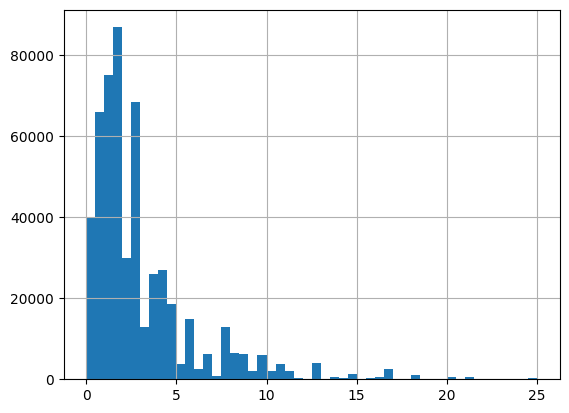

In [13]:

# Histogram of the unit price
df['UnitPrice'].hist( bins=50, range=(0,25))

### Average item-unit price

The Average item-unit prices is $4.08

### Percentage of item which cost less than $25

99.47% of items cost less than $25

### Histogram

The minimum and maximum values for the x-axis were set to (0,25)

The minimum was set at 0 as no item should cost less than $0

The maximum was set at $25 since it was previously found that 99.47% of items cost less than $25, there for using an x-axis maximum of 25 would include most values while being small enough to show detail in the plot

The historgram itself shows a signifigant right skew with most of the values falling in the $0-5 range.

It is also interesting to note that the greatest number of items fell around the $2 mark

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [14]:
# Top 10 most ordered items
# Displays StockCodeSC, Description, and Quantity
top_ten_items = df.groupby(['StockCodeSC', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
top_ten_items

StockCodeSC  Description                       
SC23843      PAPER CRAFT , LITTLE BIRDIE           80995
SC23166      MEDIUM CERAMIC TOP STORAGE JAR        78033
SC22197      SMALL POPCORN HOLDER                  57767
SC84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     55100
SC85099B     JUMBO BAG RED RETROSPOT               48877
SC85123A     WHITE HANGING HEART T-LIGHT HOLDER    41534
SC21212      PACK OF 72 RETROSPOT CAKE CASES       36502
SC84879      ASSORTED COLOUR BIRD ORNAMENT         36353
SC23084      RABBIT NIGHT LIGHT                    30771
SC22492      MINI PAINT SET VINTAGE                26668
Name: Quantity, dtype: int64

In [15]:
# Revenue generated by invoices
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * 1.25

top_10_invoices = df.groupby(['InvoiceNo', 'Description']).Revenue.sum().sort_values(ascending=False).head(5)
top_10_invoices

InvoiceNo  Description                   
547966     DOTCOM POSTAGE                    712212.5
581483     PAPER CRAFT , LITTLE BIRDIE       210587.0
541431     MEDIUM CERAMIC TOP STORAGE JAR     96479.5
540699     POSTAGE                            22500.0
554857     POSTAGE                            18000.0
Name: Revenue, dtype: float64

### Top 10 ordered items

The top 10 most ordered items with descriptions and quantities can be seen above.

There does not appear to be any trends in the most ordered items as there is a variety in their descriptions

### Top 5 revenue invoices

The Revenue of invoices was calculated by adding a 25% markup to the product of UnitPrice and Quantity

This was added as `Revenue` column in the dataframe

### Overlap in top revenue and ordered items

Two of the top 5 revenue producing invoices overlapped with the top 10 most ordered items.

These invoices ordered the *Paper craft, little birdie* and the *Medium ceramic top storage jar*

The other three invoices in the top 5 were for postage





### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [16]:
# Sort costumers by their revenue for our reference
df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

rev_segments = df.groupby('CustomerID')['Revenue'].sum().reset_index()

# Cut customers into bins based on revenue
rev_segments['Revenue Group'] = pd.cut(rev_segments['Revenue'], bins=[0, 1750, 8250, float('inf')], labels=['Low Value', 'Medium Value', 'High Value'])

In [17]:
rev_segments['Revenue Group'].value_counts()

Revenue Group
Low Value       2845
Medium Value    1254
High Value       240
Name: count, dtype: int64

In [18]:
# Merge the revenue segments with the original dataframe
df = df.merge(rev_segments[['CustomerID', 'Revenue Group']], left_on='CustomerID', right_on='CustomerID')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,Description,UnitPrice,Revenue,Revenue Group
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.125,Medium Value
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6,WHITE METAL LANTERN,3.39,25.425,Medium Value
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8,CREAM CUPID HEARTS COAT HANGER,2.75,27.500,Medium Value
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,25.425,Medium Value
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6,RED WOOLLY HOTTIE WHITE HEART.,3.39,25.425,Medium Value


In [19]:

df.pivot_table(index='StockCodeSC', columns='Revenue Group', values='Quantity', aggfunc='mean').sort_values('Low Value', ascending=False).head(10)

Revenue Group,Low Value,Medium Value,High Value
StockCodeSC,,,
SC17096,516.750000,36.714286,96.000000
SC84568,452.571429,288.000000,840.000000
SC84598,288.000000,288.000000,192.000000
SC16045,151.851852,103.846154,131.250000
SC16259,122.833333,86.166667,124.571429
SC17084R,120.000000,80.000000,248.000000
SC16049,90.000000,144.000000,90.000000
SC21641,79.000000,30.000000,32.222222
SC17001,72.000000,NaN,NaN


### Revenue Groups
There were **2845** Customers in the `Low Value` group, **1254** Customers in the `Medium Value` group, and **240** Customers in the `High Value` group.

### Items quantity across gruops
Based on the pivot table there appears to be a slight correlation between the top items ordered for each revenue group

For example **SC84568** was one of the highest average order quantity item across all three groups

However, if we look at items like **SC17096** and **SC17001** we see that they have much higher order quantities for the `low value` group than the other two


# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas